In [ ]:
from google.colab import files

In [ ]:
data = files.upload()

Saving password_strength_dataset.csv to password_strength_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('password_strength_dataset.csv')

In [ ]:
df.head(10)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [ ]:
df.shape

(669640, 2)

In [ ]:
df.tail(10)

,password,strength
669630,mywude577,1
669631,8rp4PTTM1MAlcLw0,2
669632,hattrick9,1
669633,lanciau01,1
669634,sh4tup,0
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [ ]:
df.nunique() #to get the different categories in each column

password    669574
strength         3
dtype: int64

In [ ]:
df['strength'].unique()

array([1, 2, 0])

Renaming the independent (password strength) column from
*   0 --> weak
*   1 --> medium
*   2 --> strong

In [ ]:
df['strength'] = df['strength'].replace([0,1,2],['weak','medium','strong'])
df.tail(10)

,password,strength
669630,mywude577,medium
669631,8rp4PTTM1MAlcLw0,strong
669632,hattrick9,medium
669633,lanciau01,medium
669634,sh4tup,weak
669635,10redtux10,medium
669636,infrared1,medium
669637,184520socram,medium
669638,marken22a,medium
669639,fxx4pw4g,medium


In [ ]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [ ]:
#remove the null values
df.dropna(inplace= True)
df.isnull().sum()

password    0
strength    0
dtype: int64

In [ ]:
#Check for duplicate values
print("Number of duplicates:",df.duplicated().sum())
print("size:",df.shape)

Number of duplicates: 55
size: (669639, 2)


In [ ]:
#remove duplicate values
df.drop_duplicates(inplace= True)
print("Number of duplicates:",df.duplicated().sum())
print("size:",df.shape)

Number of duplicates: 0
size: (669584, 2)


FEATURE CREATION

In [ ]:
#1. Length of password
df['length'] = df['password'].str.len()
df.head()

,password,strength,length
0,kzde5577,medium,8
1,kino3434,medium,8
2,visi7k1yr,medium,9
3,megzy123,medium,8
4,lamborghin1,medium,11


In [ ]:
#2. frequency of lower case characters
def freq_lower(text):
  lower_count=0
  length = len(text)
  for char in text:
    if char.islower():
      lower_count = lower_count +1

  freq = lower_count/length
  return freq

df['freq_lower_case'] = df['password'].astype(str).apply(freq_lower)
df.head()

,password,strength,length,freq_lower_case
0,kzde5577,medium,8,0.500000
1,kino3434,medium,8,0.500000
2,visi7k1yr,medium,9,0.777778
3,megzy123,medium,8,0.625000
4,lamborghin1,medium,11,0.909091


In [ ]:
#3. frequency of upper case characters
def freq_upper(text):
  upper_count=0
  length = len(text)
  for char in text:
    if char.isupper():
      upper_count = upper_count +1

  freq = upper_count/length
  return freq

df['freq_upper_case'] = df['password'].astype(str).apply(freq_upper)
df.head(10)

,password,strength,length,freq_lower_case,freq_upper_case
0,kzde5577,medium,8,0.500000,0.0000
1,kino3434,medium,8,0.500000,0.0000
2,visi7k1yr,medium,9,0.777778,0.0000
3,megzy123,medium,8,0.625000,0.0000
4,lamborghin1,medium,11,0.909091,0.0000
5,AVYq1lDE4MgAZfNt,strong,16,0.312500,0.5625
6,u6c8vhow,medium,8,0.750000,0.0000
7,v1118714,medium,8,0.125000,0.0000
8,universe2908,medium,12,0.666667,0.0000
9,as326159,medium,8,0.250000,0.0000


In [ ]:
#4. frequency of digits
def freq_digits(text):
  digit_count=0
  length = len(text)
  for char in text:
    if char.isdigit():
      digit_count = digit_count +1

  freq = digit_count/length
  return freq

df['freq_digit'] = df['password'].astype(str).apply(freq_digits)
df.head(10)

,password,strength,length,freq_lower_case,freq_upper_case,freq_digit
0,kzde5577,medium,8,0.500000,0.0000,0.500000
1,kino3434,medium,8,0.500000,0.0000,0.500000
2,visi7k1yr,medium,9,0.777778,0.0000,0.222222
3,megzy123,medium,8,0.625000,0.0000,0.375000
4,lamborghin1,medium,11,0.909091,0.0000,0.090909
5,AVYq1lDE4MgAZfNt,strong,16,0.312500,0.5625,0.125000
6,u6c8vhow,medium,8,0.750000,0.0000,0.250000
7,v1118714,medium,8,0.125000,0.0000,0.875000
8,universe2908,medium,12,0.666667,0.0000,0.333333
9,as326159,medium,8,0.250000,0.0000,0.750000


In [ ]:
#5. frequency of special characters
def freq_special_chars(text):
  special_char_count=0
  length = len(text)
  for char in text:
    if char in '!@#$%^&*(+=-_{}[]\/|:;,.?':
      special_char_count = special_char_count +1

  freq = special_char_count/length
  return freq

df['freq_special_char'] = df['password'].astype(str).apply(freq_special_chars)
df.head(30)

,password,strength,length,freq_lower_case,freq_upper_case,freq_digit,freq_special_char
0,kzde5577,medium,8,0.500000,0.0000,0.500000,0.000000
1,kino3434,medium,8,0.500000,0.0000,0.500000,0.000000
2,visi7k1yr,medium,9,0.777778,0.0000,0.222222,0.000000
3,megzy123,medium,8,0.625000,0.0000,0.375000,0.000000
4,lamborghin1,medium,11,0.909091,0.0000,0.090909,0.000000
5,AVYq1lDE4MgAZfNt,strong,16,0.312500,0.5625,0.125000,0.000000
6,u6c8vhow,medium,8,0.750000,0.0000,0.250000,0.000000
7,v1118714,medium,8,0.125000,0.0000,0.875000,0.000000
8,universe2908,medium,12,0.666667,0.0000,0.333333,0.000000
9,as326159,medium,8,0.250000,0.0000,0.750000,0.000000


In [ ]:
data2 = files.upload()

Saving 10k_common_password.csv to 10k_common_password.csv


In [ ]:
df_common = pd.read_csv("10k_common_password.csv")
df_common.head(7)

,common_password
0,password
1,123456
2,12345678
3,1234
4,qwerty
5,12345
6,dragon


In [ ]:
#6. Common Password Check
def check_common_password(text):
  if text.lower() in df_common['common_password'].values: #.values converts data frame into an array
    return 1
  else:
    return 0

df['common_password'] = df['password'].astype(str).apply(check_common_password)
df['common_password'].value_counts()

0    668797
1       787
Name: common_password, dtype: int64

[Text(0, 0, '496780'), Text(0, 0, '89674'), Text(0, 0, '83130')]

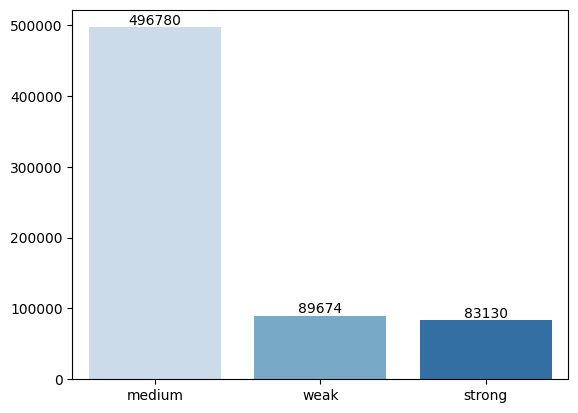

In [ ]:
#plotting a bar graph to understand the data
strength_type = df['strength'].value_counts().index #gets the category name of each category
strength_value = df['strength'].value_counts().values #gets the number count of each category
chart1 = sns.barplot(x=strength_type, y=strength_value, palette='Blues')
chart1.bar_label(chart1.containers[0]) #to get the value of each bar

It is visible that *strong* category data points are least which is a **Data Imbalance Issue** which is why it is important to undersample the majority categories which are in this case *medium* and *weak*.



In [ ]:
#Undersampling to handle data imbalance
from sklearn.utils import resample

#make dataframes with only one strength category
df_medium = df[df['strength']=='medium']
df_weak = df[df['strength']=='weak']
df_strong = df[df['strength']=='strong']

#undersample the 'medium' strength
new_medium_df = resample(df_medium,
                  n_samples = len(df_strong), #length of majority columns to be equal to minority
                  replace = False, #no duplicates
                  random_state= 10)

#undersample the 'weak' strength
new_weak_df = resample(df_weak,
                  n_samples = len(df_strong),
                  replace = False,
                  random_state= 10)

df = pd.concat([df_strong, new_weak_df, new_medium_df]) #concatanate all 3 strength categories
print(df['strength'].value_counts())

strong    83130
weak      83130
medium    83130
Name: strength, dtype: int64


Text(0.5, 1.0, 'After UnderSampling')

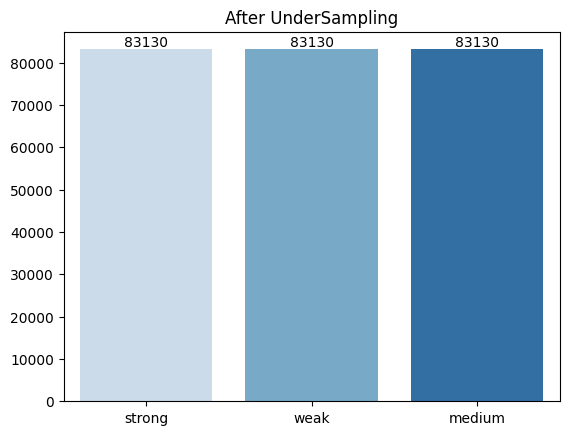

In [ ]:
#plotting a bar graph to understand the data
strength_type = df['strength'].value_counts().index
strength_value = df['strength'].value_counts().values
chart1 = sns.barplot(x=strength_type, y=strength_value, palette='Blues')
chart1.bar_label(chart1.containers[0])
plt.title("After UnderSampling")

In [ ]:
print("Dataset after UnderSampling:")
df.head()

Dataset after UnderSampling:


,password,strength,length,freq_lower_case,freq_upper_case,freq_digit,freq_special_char,common_password
5,AVYq1lDE4MgAZfNt,strong,16,0.312500,0.5625,0.125000,0.000000,0
13,WUt9IZzE0OQ7PkNE,strong,16,0.187500,0.6250,0.187500,0.000000,0
20,elyass15@ajilent-ci,strong,19,0.789474,0.0000,0.105263,0.105263,0
22,klara-tershina3H,strong,16,0.812500,0.0625,0.062500,0.062500,0
41,pHyqueDIyNQ8vmhb,strong,16,0.625000,0.3125,0.062500,0.000000,0


In [ ]:
#shuffle the rows
df=df.sample(frac=1, random_state=9) #frac=1 means all rows to include, frac=0.5 means only half rows to include

#reset the serial/index number from 0
df.reset_index(drop=True, inplace=True) #drop ensures old value have been removed or else when drop=False old index become a new column
print("Dataset after Shuffling and Reseting:")
df.head(10)

Dataset after Shuffling and Reseting:


,password,strength,length,freq_lower_case,freq_upper_case,freq_digit,freq_special_char,common_password
0,pmqiofsd7,medium,9,0.888889,0.0000,0.111111,0.000000,0
1,yf4ZWJjc3MgZWVBy,strong,16,0.375000,0.5000,0.125000,0.000000,0
2,Lbtp7TjQ4OAt0UTt,strong,16,0.375000,0.4375,0.187500,0.000000,0
3,audio1,weak,6,0.833333,0.0000,0.166667,0.000000,0
4,dej114,weak,6,0.500000,0.0000,0.500000,0.000000,0
5,preet4u,weak,7,0.857143,0.0000,0.142857,0.000000,0
6,Beqm41DM3NgQ7EbX,strong,16,0.312500,0.4375,0.250000,0.000000,0
7,omar11,weak,6,0.666667,0.0000,0.333333,0.000000,0
8,espinozaLUCAS789,strong,16,0.500000,0.3125,0.187500,0.000000,0
9,sai.oleti13@gmail.com,strong,21,0.761905,0.0000,0.095238,0.142857,0


<ipython-input-28-e1abfd124038>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

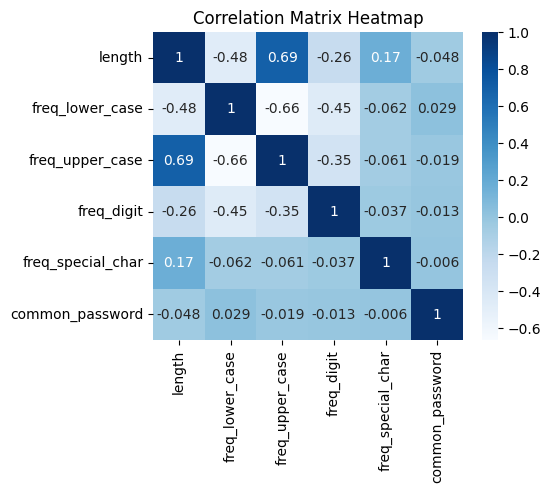

In [ ]:
#Correlation Matrix to help understand dataset
cor_matrix = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(cor_matrix, annot=True, cmap='Blues')
#annot--> shows value of each cell
#cmap--> colour theme
plt.title("Correlation Matrix Heatmap")

The above Correlation Matrix shows that almost all features are uncorrelated, except frequency on lower case letters and length since most of the passwords are in lowercase.

**Split Dataset into Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['strength', 'password'], axis='columns') #input will not have password since we are descibing it using other features created
y = df['strength'] #output class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

**K Nearest Neighbour (KNN) Classification**

KNN Model Accuracy: 0.9998596575644573
KNN Model Classification Report:
               precision    recall  f1-score   support

      medium       1.00      1.00      1.00     16564
      strong       1.00      1.00      1.00     16640
        weak       1.00      1.00      1.00     16674

    accuracy                           1.00     49878
   macro avg       1.00      1.00      1.00     49878
weighted avg       1.00      1.00      1.00     49878



Text(0.5, 1.0, 'Confusion Matrix of KNN')

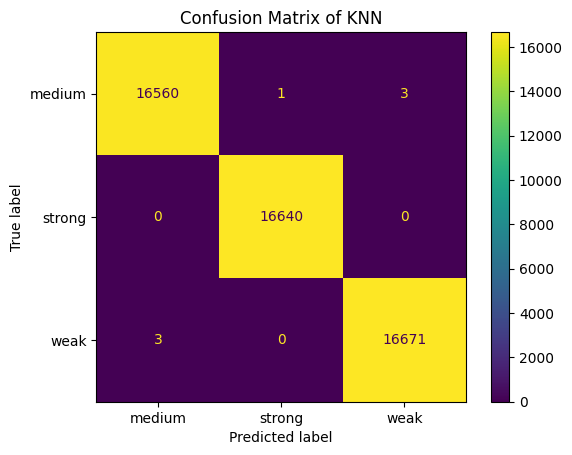

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors = 500) #n value = √data_size (rows) = √249411 ≈ 500
knn.fit(x_train, y_train) #train model by fitting
knn_y_pred = knn.predict(x_test) #test the model

#Performance Metrics
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
print('KNN Model Accuracy:',knn_acc)
print('KNN Model Classification Report:\n',knn_report)

#Confusion Matrix
knn_con_matrix = confusion_matrix(y_test, knn_y_pred, labels = knn.classes_)
knn_display = ConfusionMatrixDisplay(confusion_matrix = knn_con_matrix,
                                 display_labels = knn.classes_)
knn_display.plot()
plt.title("Confusion Matrix of KNN")

**Random Forest Cassification**

Random Forest Model Accuracy: 0.9998797064838205
Random Forest Model Classification Report:
               precision    recall  f1-score   support

      medium       1.00      1.00      1.00     16564
      strong       1.00      1.00      1.00     16640
        weak       1.00      1.00      1.00     16674

    accuracy                           1.00     49878
   macro avg       1.00      1.00      1.00     49878
weighted avg       1.00      1.00      1.00     49878



Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

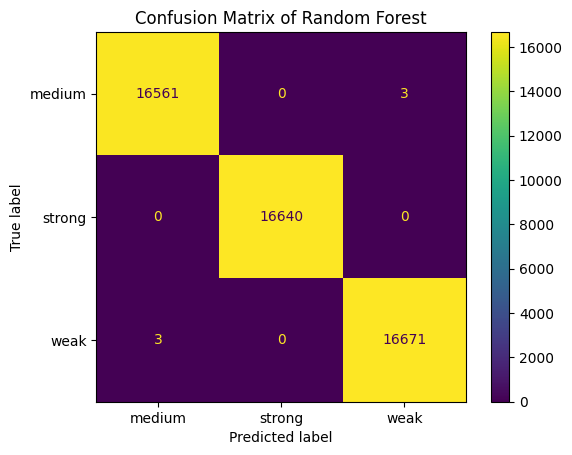

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#n_estimator --> no of decision trees to be used
#max-depth --> height/depth of each tree
rf = RandomForestClassifier(n_estimators= 10, max_depth= 5, random_state=4)
rf.fit(x_train, y_train) #train the model
rf_y_pred = rf.predict(x_test)

#Performance Metrics
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
print('Random Forest Model Accuracy:',rf_acc)
print('Random Forest Model Classification Report:\n',rf_report)

#Confusion Matrix
rf_con_matrix = confusion_matrix(y_test, rf_y_pred, labels = rf.classes_)
rf_display = ConfusionMatrixDisplay(confusion_matrix = rf_con_matrix,
                                 display_labels = rf.classes_)
rf_display.plot()
plt.title("Confusion Matrix of Random Forest")

**Support Vector Machine (SVM) Classification**

Random Forest Model Accuracy: 0.9998797064838205
Random Forest Model Classification Report:
               precision    recall  f1-score   support

      medium       1.00      1.00      1.00     16564
      strong       1.00      1.00      1.00     16640
        weak       1.00      1.00      1.00     16674

    accuracy                           1.00     49878
   macro avg       1.00      1.00      1.00     49878
weighted avg       1.00      1.00      1.00     49878



Text(0.5, 1.0, 'Confusion Matrix of SVM')

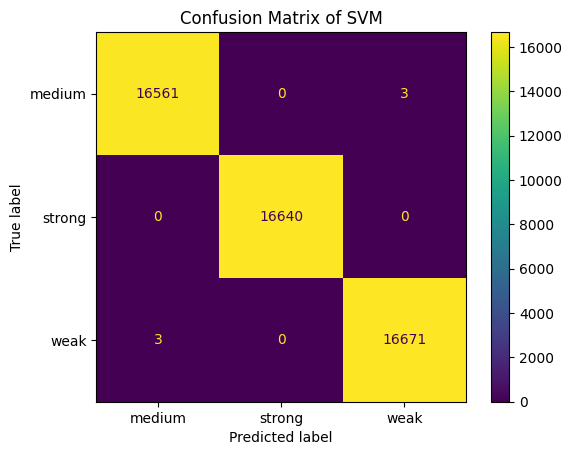

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel ='poly', random_state=5)
#kernel='poly' determines the type of kernel function used is polynomial
svm.fit(x_train, y_train) #train model
svm_y_pred = svm.predict(x_test) #test model

#MPerformance Metrics
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
print('Random Forest Model Accuracy:',svm_acc)
print('Random Forest Model Classification Report:\n',svm_report)

#Confusion Matrix
svm_con_matrix = confusion_matrix(y_test, svm_y_pred, labels = svm.classes_)
svm_display = ConfusionMatrixDisplay(confusion_matrix = svm_con_matrix,
                                 display_labels = svm.classes_)
svm_display.plot()
plt.title("Confusion Matrix of SVM")

In [ ]:
acc = {"Model": ['Support Vector Machine', 'Random Forest', 'K Nearest Neighbour'],
       "Accuracy": [svm_acc, rf_acc, knn_acc]}
df_acc = pd.DataFrame(acc)
high_acc = df_acc['Accuracy'].max()
best_model = df_acc.loc[df_acc['Accuracy'].idxmax(), 'Model']
#.loc[row_label, column_label]
#.idxmax()--> index label where the maximum value is located
print(df_acc)
print("\nHighest Accuracy:", high_acc)
print("Best Model:", best_model)

                    Model  Accuracy
0  Support Vector Machine   0.99988
1           Random Forest   0.99988
2     K Nearest Neighbour   0.99986

Highest Accuracy: 0.9998797064838205
Best Model: Support Vector Machine


Since SVM gives the best accuracy we will use this model to predict data.

In [ ]:
#Remove Warning Messages
import warnings
warnings.filterwarnings('ignore')

#Input from user
password = input("Enter your Password: ")
input_list = [] #empty list

#apply all feature engineering steps
input_list.append(len(password)) #length
input_list.append(freq_lower(password)) #lowercase
input_list.append(freq_upper(password)) #uppercase
input_list.append(freq_digits(password)) #digits
input_list.append(freq_special_chars(password)) #special characters
input_list.append(check_common_password(password))
input_array=[input_list] #convert from 6 rows 1 columns to 1 row 6 columns
pred_strength = svm.predict(input_array)
print("Predicted Strength of Password:", pred_strength[0])

Enter your Password: ABC_abc#269@123)*&
Predicted Strength of Password: strong
